<a href="https://colab.research.google.com/github/hg15200/Clase/blob/main/Practica_2_HectorGutierrezArance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src=https://static.casadomo.com/media/2020/02/lonmark-espana-universidad-valencia-jornada-automatizacion.png width="300">


# Procesado de Señal

# Práctica 2


# Parte 1 - Normalización y codificación de señales

Detalles en: 
https://scikit-learn.org/stable/modules/preprocessing.html

## 1.1.1. Vamos a normalizar variables
Leemos las librerias necesarias

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Descargamos los datos de los datasets de sklearn y los visualizamos un poco

In [2]:
iris = datasets.load_iris()

In [3]:
# Muestra la descripción
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# las entradas
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
# las salidas
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# tamaño de entrada
iris.data.shape

(150, 4)

In [7]:
# tamaño de salida
iris.target.shape

(150,)

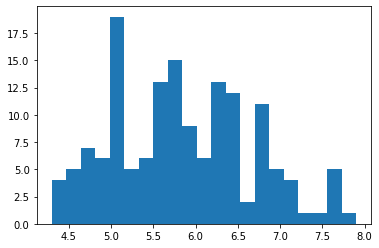

In [8]:
# un histograma de la primera dimension
plt.hist(iris.data[:,0],21);

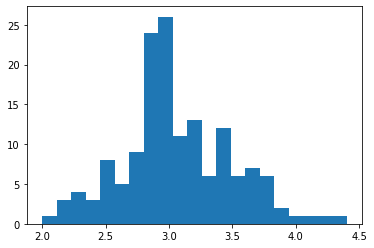

In [9]:
# un histograma de la segunda dimension
plt.hist(iris.data[:,1],21);

### Normalizamos la primera variable "a mano"

In [10]:
X = iris.data

In [11]:
X.shape

(150, 4)

#### Normalizamos sin quitar el mínimo

In [12]:
X_n = X[:,0] / np.max(X[:,0])

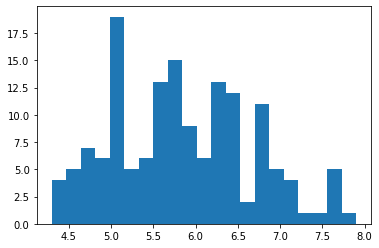

In [13]:
# Histograma sin normalizar
plt.hist(X[:,0],21);

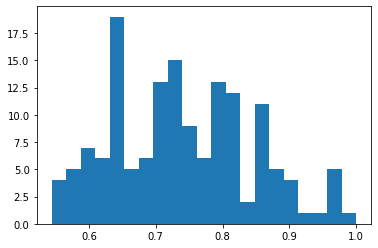

In [14]:
# Histograma normalizando
plt.hist(X_n,21);

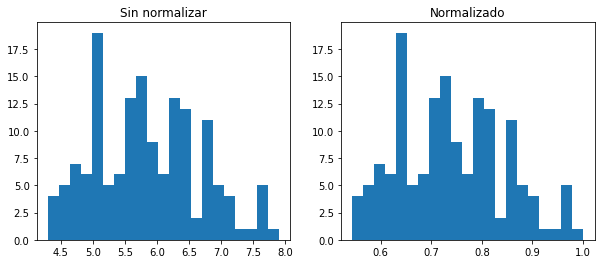

In [15]:
# Usando subplot ...
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X[:,0],21), plt.title('Sin normalizar')
plt.subplot(1,2,2), plt.hist(X_n,21), plt.title('Normalizado');

#### Ejercicio: 
Haz lo mismo pero para la dimensión 2, i.e. X\[:,1\]

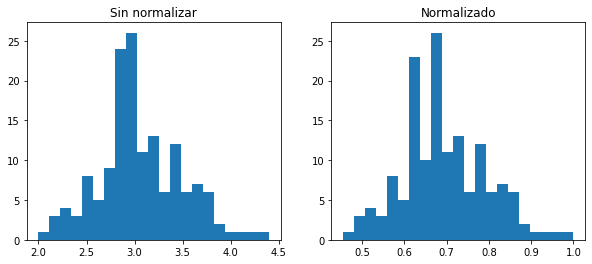

In [30]:
X_n = X[:,1] / np.max(X[:,1])

# Usando subplot ...
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X[:,1],21), plt.title('Sin normalizar')
plt.subplot(1,2,2), plt.hist(X_n,21), plt.title('Normalizado');

#### Normalizamos quitando el mínimo

In [28]:
X_n = (X[:,0] - np.min(X[:,0])) / (np.max(X[:,0]) - np.min(X[:,0]))

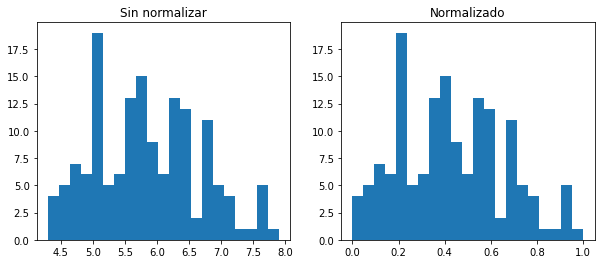

In [29]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X[:,0],21), plt.title('Sin normalizar')
plt.subplot(1,2,2), plt.hist(X_n,21), plt.title('Normalizado');

#### Ejercicio: 
Haz lo mismo pero para la dimensión 2, i.e. X\[:,1\]

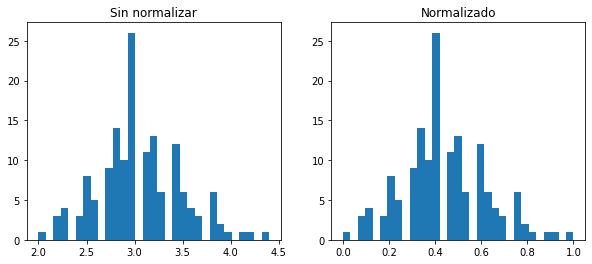

In [26]:
X_n = (X[:,1] - np.min(X[:,1])) / (np.max(X[:,1]) - np.min(X[:,1]))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X[:,1],31), plt.title('Sin normalizar')
plt.subplot(1,2,2), plt.hist(X_n,31), plt.title('Normalizado');

#### Estandarizamos

In [23]:
X_n = (X[:,0] - np.mean(X[:,0])) / (np.std(X[:,0]))

(<matplotlib.axes._subplots.AxesSubplot at 0x7f86356dec10>,
 (array([ 4.,  5.,  7.,  6., 19.,  5.,  6., 13., 15.,  9.,  6., 13., 12.,
          2., 11.,  5.,  4.,  1.,  1.,  5.,  1.]),
  array([-1.87002413e+00, -1.66230778e+00, -1.45459144e+00, -1.24687509e+00,
         -1.03915874e+00, -8.31442387e-01, -6.23726038e-01, -4.16009689e-01,
         -2.08293339e-01, -5.76989859e-04,  2.07139359e-01,  4.14855709e-01,
          6.22572058e-01,  8.30288407e-01,  1.03800476e+00,  1.24572111e+00,
          1.45343746e+00,  1.66115380e+00,  1.86887015e+00,  2.07658650e+00,
          2.28430285e+00,  2.49201920e+00]),
  <a list of 21 Patch objects>),
 Text(0.5, 1.0, 'estandarizando'))

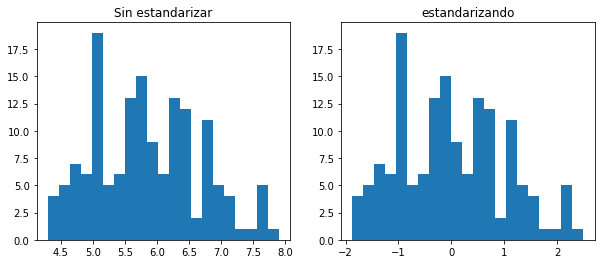

In [24]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X[:,0],21), plt.title('Sin estandarizar')
plt.subplot(1,2,2), plt.hist(X_n,21), plt.title('estandarizando')

#### Ejercicio: 
Haz lo mismo pero para la dimensión 2, i.e. X\[:,1\]

(<matplotlib.axes._subplots.AxesSubplot at 0x7f86355f6b80>,
 (array([ 1.,  3.,  4.,  3.,  8.,  5., 23., 10., 26., 11., 13.,  6., 12.,
         10.,  3.,  6.,  2.,  1.,  1.,  1.,  1.]),
  array([-2.43394714, -2.17086512, -1.9077831 , -1.64470109, -1.38161907,
         -1.11853705, -0.85545503, -0.59237301, -0.32929099, -0.06620897,
          0.19687304,  0.45995506,  0.72303708,  0.9861191 ,  1.24920112,
          1.51228314,  1.77536516,  2.03844717,  2.30152919,  2.56461121,
          2.82769323,  3.09077525]),
  <a list of 21 Patch objects>),
 Text(0.5, 1.0, 'estandarizando'))

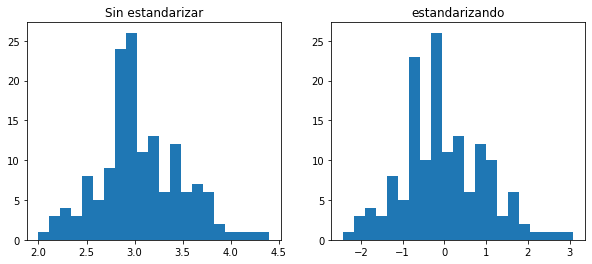

In [25]:
X_n = (X[:,1] - np.mean(X[:,1])) / (np.std(X[:,1]))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X[:,1],21), plt.title('Sin estandarizar')
plt.subplot(1,2,2), plt.hist(X_n,21), plt.title('estandarizando')

#### Ejercicio:

Explica la diferencia entre los tres métodos

Cuando se realiza una normalización, no cambian los valores pero si lo hace la escala. En el caso de normalizar quitando el mínimo da como resultado el inicio de la señal en 0. Por su parte la estandarización permite obtener la misma forma de la señal pero en valores unificados que en este caso van del -2 al 3 (en lugar del 2 al 4,5 como se puede observar en la gráfica obtenida sin aplicar la estandarización).

### Normalizamos usando Sklearn

https://scikit-learn.org/stable/modules/preprocessing.html

In [31]:
from sklearn import preprocessing

#### Estandarizamos directamente

In [32]:
# Usamos la función de estandarización del sklearn
X_n = preprocessing.scale(X[:,0])

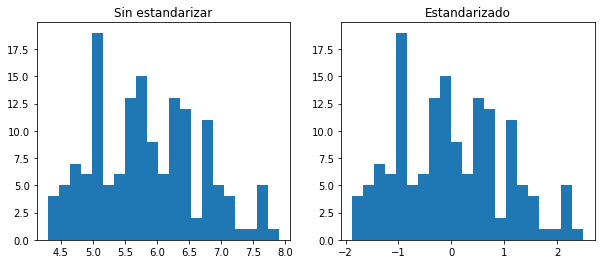

In [33]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X[:,0],21), plt.title('Sin estandarizar')
plt.subplot(1,2,2), plt.hist(X_n,21), plt.title('Estandarizado');

#### Usamos los modelos de normalizacion

In [34]:
X[:,0].shape

(150,)

In [35]:
# creamos la funcion para estandarizar y la entrenamos
scaler = preprocessing.StandardScaler().fit(X)

In [36]:
# La funcion contiene informacion sobre los datos originales
# la media
print(scaler.mean_)
# el rango
print(scaler.scale_)

[5.84333333 3.05733333 3.758      1.19933333]
[0.82530129 0.43441097 1.75940407 0.75969263]


In [39]:
# si quiero estandarizar solo tengo que aplicar la funcion a los datos que quiera estandarizar
X_n = scaler.transform(X)

X_n.shape

(150, 4)

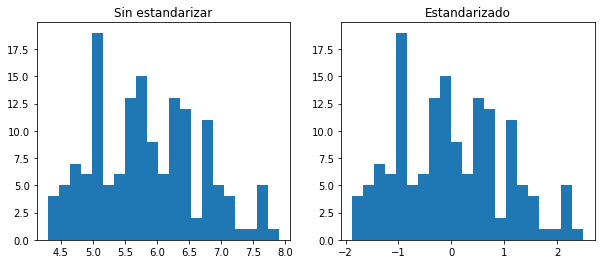

In [38]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X[:,0],21), plt.title('Sin estandarizar')
plt.subplot(1,2,2), plt.hist(X_n[:,0],21), plt.title('Estandarizado');

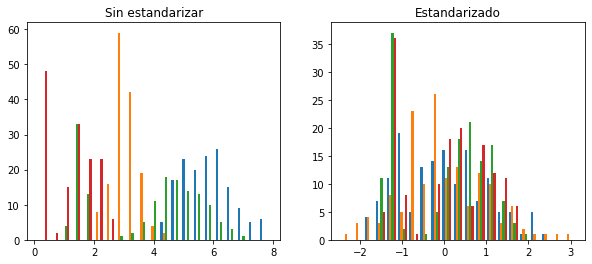

In [40]:
# Fíjate que ha estandarizado todas las dimensiones
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X,21), plt.title('Sin estandarizar')
plt.subplot(1,2,2), plt.hist(X_n,21), plt.title('Estandarizado');

#### Ejercicio: 
Hay otros modelos, pruébalos. ¿Qué es lo que hacen en los datos?
- `preprocessing.MinMaxScaler()`
- `preprocessing.MaxAbsScaler()`

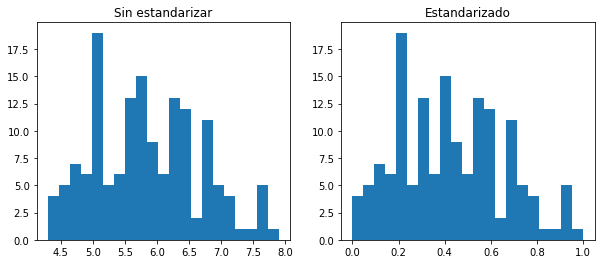

In [41]:
scaler = preprocessing.MinMaxScaler().fit(X)
X_n = scaler.transform(X)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X[:,0],21), plt.title('Sin estandarizar')
plt.subplot(1,2,2), plt.hist(X_n[:,0],21), plt.title('Estandarizado');

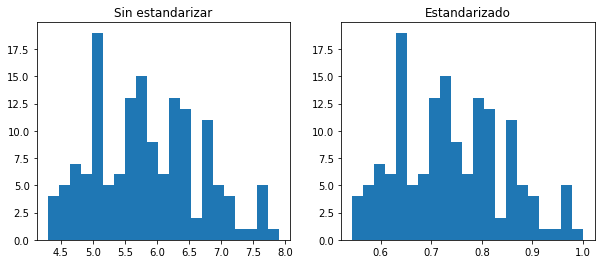

In [42]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_n = scaler.transform(X)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X[:,0],21), plt.title('Sin estandarizar')
plt.subplot(1,2,2), plt.hist(X_n[:,0],21), plt.title('Estandarizado');

In [ ]:
# Tu respuesta aquí
El primero hace lo mismo que el normalizo quitando el minimo y el segundo hace lo mismo que sin quitar el mínimo.

#### Ejercicio: 
El uso de modelos de normalización nos permite normalizar otros data sets utilizando exactamente la misma transformación. Esto es útil para normalizar los datos de entrenamiento, test y validación de la misma forma utilizando solo la informacióón de los datos de entrenamiento.

Particiona los datos originales en train/test, entrena el modelo de normalización utilizando los datos de train, y normaliza los datos de train y test utilizando este modelo. Ayuda: utiliza la función `train_test_split` de sklearn.

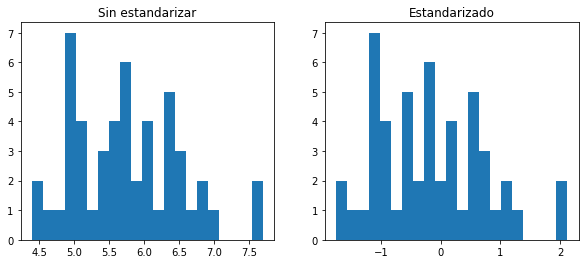

In [48]:
from sklearn import model_selection

X_train, X_test = model_selection.train_test_split(X,test_size=0.33)

scaler = preprocessing.StandardScaler().fit(X_train)
X_n = scaler.transform(X_test)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X_test[:,0],21), plt.title('Sin estandarizar')
plt.subplot(1,2,2), plt.hist(X_n[:,0],21), plt.title('Estandarizado');

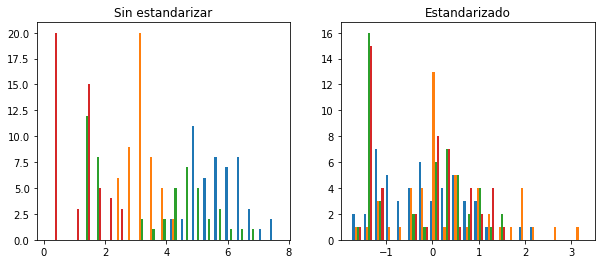

In [53]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X_test,21), plt.title('Sin estandarizar')
plt.subplot(1,2,2), plt.hist(X_n,21), plt.title('Estandarizado');

## 1.1.2 Normalización avanzada

En realidad esta parte es una ecualización de los datos. Convierte su distribución marginal (1D) para que tenga la distribucióón que nosotros queramos (uniforme, Gausiana, ...). Piensa que la transformacióón es monotónica creciente por lo que conserva el orden de los datos.

In [55]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

quantile_transformer = preprocessing.QuantileTransformer(random_state=0)

X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)

np.percentile(X_train[:, 0], [0, 25, 50, 75, 100])

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (112). n_quantiles is set to n_samples.
  warnings.warn(


array([4.3, 5.1, 5.8, 6.5, 7.9])

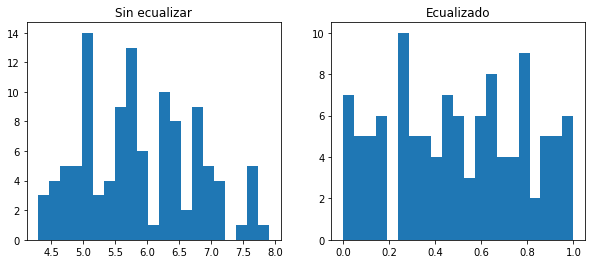

In [56]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X_train[:,0],21), plt.title('Sin ecualizar')
plt.subplot(1,2,2), plt.hist(X_train_trans[:,0],21), plt.title('Ecualizado');

#### Ejercicio: 
Transforma los datos de train para que tengan distribucion Gaussiana

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (112). n_quantiles is set to n_samples.
  warnings.warn(


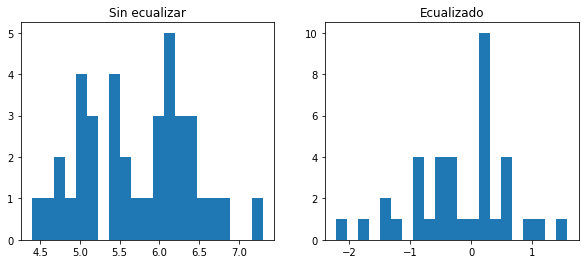

In [58]:
quantile_transformer = preprocessing.QuantileTransformer(random_state=0, output_distribution = 'normal')

X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X_test[:,0],21), plt.title('Sin ecualizar')
plt.subplot(1,2,2), plt.hist(X_test_trans[:,0],21), plt.title('Ecualizado');

#### Ejercicio: 
Transforma los datos de test utilizando la transformacion de los datos de train

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (112). n_quantiles is set to n_samples.
  warnings.warn(


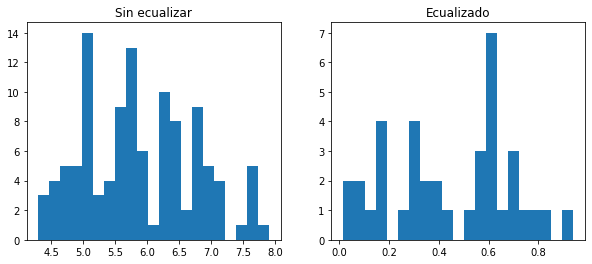

In [59]:
#quantile_transformer = preprocessing.PowerTransformer(method='box-cox', standardize=False)
# Otra opción 
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)

X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X_train[:,0],21), plt.title('Sin ecualizar')
plt.subplot(1,2,2), plt.hist(X_test_trans[:,0],21), plt.title('Ecualizado');

#### Ejercicio_extra: 
¿Cómo se haría en más dimensiones?

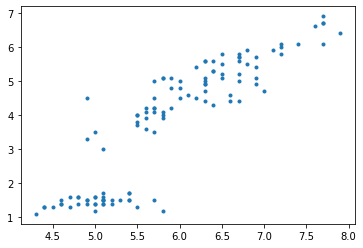

In [76]:
plt.plot(X_train[:,0],X_train[:,2],'.')

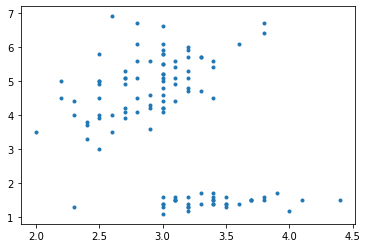

In [71]:
plt.plot(X_train[:,1],X_train[:,2],'.')

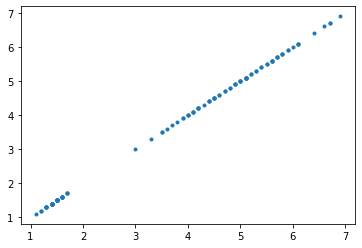

In [72]:
plt.plot(X_train[:,2],X_train[:,2],'.')

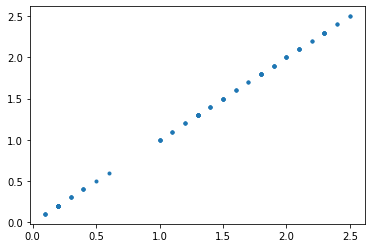

In [74]:
plt.plot(X_train[:,3],X_train[:,3],'.')

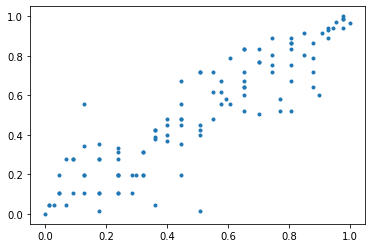

In [64]:
plt.plot(X_train_trans[:,0],X_train_trans[:,2],'.')

(array([ 8.,  0.,  9.,  0., 11.,  6.,  3.,  6.,  6.,  3.,  8.,  4.,  6.,
         3.,  4.,  8.,  6.,  4.,  6.,  6.,  5.]),
 array([0.        , 0.04761905, 0.0952381 , 0.14285714, 0.19047619,
        0.23809524, 0.28571429, 0.33333333, 0.38095238, 0.42857143,
        0.47619048, 0.52380952, 0.57142857, 0.61904762, 0.66666667,
        0.71428571, 0.76190476, 0.80952381, 0.85714286, 0.9047619 ,
        0.95238095, 1.        ]),
 <a list of 21 Patch objects>)

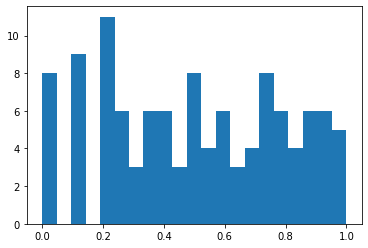

In [ ]:
plt.hist(X_train_trans[:,2],21)

#### Ejercicio extra: 
Visualiza que le pasa a una imágen cuando se ecualizan los valores de los pixels.

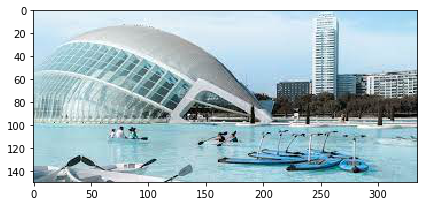

In [79]:
from skimage import io
img = io.imread('valencia.jfif')
io.imshow(img)
io.show()

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Parte 2 - Métodos selección y extracción de características

# Selección de caraterísticas mediante métodos *filter*

## Correlación entre las variables de entrada y la de salida
### El método consiste en ver qué variables de entrada están más correlacionadas con la salida y escoger aquellas con mayor correlación
### Seguimos con el dataset IRIS

In [80]:
X, y = load_iris(return_X_y=True)

#### Ejercicio:
Calcula la correlación (`np.corrcoef`) entre las entradas y la salidas. Muestra los valores calculados y selecciona dos de las variables más adecuadas.

In [81]:
np.corrcoef(X[:,0],y)[0,1]

0.782561231810082

In [82]:
np.corrcoef(X[:,1],y)[0,1]

-0.4266575607811244

In [83]:
np.corrcoef(X[:,2],y)[0,1]

0.9490346990083889

In [84]:
np.corrcoef(X[:,3],y)[0,1]

0.9565473328764034

In [89]:
X.shape

(150, 4)

## Correlación entre variables de entrada
### En este caso vamos a descartar variables de entrada que estén muy correlacionadas entre sí, puesto que entendemos que no añaden más información al modelo y pueden perjudicar su rendimiento.
#### Por ejemplo si encontramos que las variables `X[:,0]` y `X[:,1]` (dimensiones 1 y 2) están muy correlacionadas descartaremos una de las dos.
#### Ejercicio:
Calcula la correlación entre todas las variables de entrada y descarta alguna con alta correlación cruzada.

In [107]:


# Calcular la matriz de correlación
X_r = np.corrcoef(X, rowvar=False)

# Inicializar una lista para almacenar las variables con alta correlación
high_corr_vars = []

# Umbral de correlación para considerar alta correlación
threshold = 0.95

# Recorrer las variables (columnas) de la matriz de datos
for i in range(X_r.shape[1]):
    for j in range(i + 1, X_r.shape[1]):
        # Comparar la correlación entre cada par de variables
        if abs(X_r[i, j]) > threshold:
            # Si la correlación es alta, agregar ambas variables a la lista de variables con alta correlación
            high_corr_vars.append(i)
            high_corr_vars.append(j)

# Eliminar las variables con alta correlación
data = np.delete(X_r, high_corr_vars, axis=1)

print(X_r)



[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


#### Ejercicio
Representa gráficamente las relaciones entre variables (puedes usar `plt.imshow`).

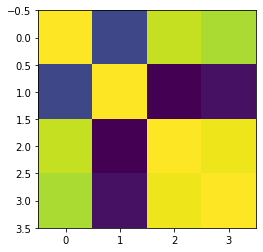

In [96]:
plt.imshow(np.corrcoef(X,rowvar=False))

## Información mutua (MI) entre las variables de entrada y salida

### En primer lugar vamos a calcular la MI. Por definición sabemos que la MI entre dos variables **discretas** $X,Y$ viene dada por
$$ \textrm{MI}(X,Y) = \sum_{y\in \mathcal{Y}}\sum_{x\in \mathcal{X}} p(x,y)\log\left(\frac{p(x,y)}{p(x)p(y)}\right) $$
Más info: https://en.wikipedia.org/wiki/Mutual_information

En primer lugar estimamos la probabilidad para cada clase de la variable de salida. También podemos calcular su entropía que, viene dada por $ J(y)=-\sum p(y)\log p(y) $.

In [109]:
# Entropia de las variables //discretas// de salida: J(y) = -sum P(c)log(P(c))
classes = np.unique(y)
# Probablidad de cada classe
py = np.zeros(len(classes))
for nc, c in enumerate(classes):
    py[c] = np.sum(y == c)
# Convertimos en probablididades normalizando por el total
py /= np.sum(py)
# Calculamos la entropía
jy = np.sum(py * np.log(py))
print('p(y)', py, 'y entropy', jy)

p(y) [0.33333333 0.33333333 0.33333333] y entropy -1.0986122886681096


### Para poder trabajar con las variables de la entrada tendremos que cuantificarlas dado que son continuas.
#### Ejercicio:
Utiliza `KBinsDiscretizer` visto en la primera parte para crear una nueva variable `Xd` discretizando la variable `X`. Utiliza 9 bins.

In [110]:
from sklearn.preprocessing import KBinsDiscretizer
# Ejercicio: jugar con distintos bins. Cuanto más, más fino, pero mayor entropía.
kbd = KBinsDiscretizer(n_bins=9, encode='ordinal')
Xd = kbd.fit_transform(X)

#### Ejercicio Resuelto:
Completa el siguiente código para estimar p(x) y p(x,y) y así poder calcular la MI entre cada variable de entrada y la salida.
<br>Los trozos de código entre `# --------------` son los que debes rellenar.

In [112]:
# Vamos a calcular la MI para cada variable en X
nv = Xd.shape[1]
mi = np.zeros(nv)
# Valores distintos en Xd
xvalues = np.unique(Xd)
for v in range(nv):
    # Calculamos px
    px = np.zeros(len(xvalues))
    # --------------
    for i, value in enumerate(xvalues):
        px[i] = np.sum([Xd[:,v] == value])
    px /= np.sum(px)
    # --------------

    # Calculamos pxy
    pxy = np.zeros((len(xvalues), len(classes)))
    # --------------
    for i, value in enumerate(xvalues):
        for j, cls in enumerate(classes):
            pxy[i,j] = np.sum((Xd[:,v] == value) & (y == cls))
    pxy /= np.sum(pxy)
    # --------------
    
    # Calculamos MI: sum_x(sum_y( p(x,y) * log(p(x,y) / (p(x)*p(y)) ))
    mi[v] = 0.0
    for i in range(pxy.shape[0]):
        for j in range(pxy.shape[1]):
            # Evitar divisiones por cero y logaritmos = -inf
            if pxy[i,j] > 0 and px[i] > 0 and py[j] > 0:
                # --------------
                mi[v] += pxy[i,j] * np.log(pxy[i,j] / px[i] / py[j])
                # --------------

print(mi)    

[0.5032742  0.31671819 0.98041703 0.97135001]


#### Ejercicio
Compara el resultado obtenido con el de la implementación de scikit learn `sklearn.feature_selection.mutual_info_classif`.

In [113]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X, y, discrete_features='auto')
print(mi)

[0.50229718 0.29636587 0.98608113 0.98235594]


### En sci-kit learn tenemos una función para seleccionar las mejores `k` variables, `SelectKBest`. Esto junto con la función `mutual_info_classif` nos permite seleccionar grupos de variables.
#### Ejercicio:
Utiliza `sklearn.feature_selection.SelectKBest` y `mutual_info_classif` para seleccionar automáticamente las dos mejores variables.

In [ ]:
from sklearn.feature_selection import SelectKBest
Xnew = SelectKBest(mutual_info_classif, k=2).fit_transform(X, y)
Xnew.shape

(150, 2)

* Hay otros estadísticos que se pueden usar en problemas de clasificación:
    - `chi2`: estadístico $\chi^2$ (chi cuadrado) entre X, y.
    - `f_classif`: Test ANOVA entre X, y.
- Para problemas de regression podemos usar `mutual_info_regression` o `f_regression`.

## Información Mútua entre variables de entrada
### Igual que con la correlación, entre dos variables con MI alto una de ellas podría descartarse.
#### Ejercicio:
Utiliza `mutual_info_regression` entre cada par de variables de entrada para detectar las que contienen información mútua y descarta una de ellas.

[3.24027054 0.26960809 0.8623282  0.60492889]
[0.31462327 2.70008337 0.30951314 0.42384821]
[0.87062424 0.34293345 3.20856395 1.18513448]
[0.63216726 0.42638752 1.18787716 2.70613896]


# Selección de caraterísticas mediante métodos *wrapper*
### Los métodos *wrapper* se basan en seleccionar las variables que mejor funcionarán para un determinado modelo. Para ello necesitamos un modelo de clasificación o regresión, e iremos probando todas las combinaciones de variables una a una y en grupos.
### Vamos a experimentar con este método con un problema sencillo de regresión donde ajustaremos una recta por mínimos cuadrados. El problema lo generaremos con la función `make_regression` de scikit-learn, asegurándonos de crear un número de variables informativas menor que el número total de variables, tal y como muestra el código a continuación.
### Generamos 100 muestras de un problema de regresión con 4 variables de entrada y una de salida. De las 4 variables solo 3 son necesarias para poder predecir. Además añádimos una pequeña cantidad de ruido para complicar un poco el problema.

In [ ]:
from sklearn.datasets import make_regression
# Para que el ejemplo tenga sentido tenemos que poner n_informative < n_features
X, y = make_regression(n_samples=100, n_features=4, n_informative=3, n_targets=1, noise=0.01)

### En la siguiente celda de código hacemos dos cosas:
1. Dividimos el conjunto de `X,y` en entrenamiento (train) y test.
2. Definimos una clase de Python con un modelo sencillo de regresión lineal.

Como os podéis imaginar ya existen modelos así en scikit-learn. El objetivo de definir uno nosotros es doble: 1) para que tengáis un ejemplo de cómo se hace, y 2) para que os familiarizéis con la programación de objetos en Python.

In [ ]:
# Separamos en entrenamiento y test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33)

# Nos aseguramos de que la y tenga dimensión Nx1
ytrain = ytrain.reshape(-1,1)
ytest = ytest.reshape(-1,1)

# Definimos un modelo sencillo de regresión lineal
class myLinearModel:
    def __init__(self):
        self.alphas = None
    
    def add_ones(self, X):
        ones = np.ones((X.shape[0] ,1))
        return np.hstack((X, ones))
    
    def fit(self, X, y):
        # y = X*alphas => pinv(X)*y = alphas
        self.alphas = np.dot(np.linalg.pinv(self.add_ones(X)), y)
        return self.alphas

    # Con esta función predecimos
    def predict(self, X):
        if self.alphas is not None:
            return np.dot(self.add_ones(X), self.alphas)
        else:
            return None

    # Y con esta otra medimos el error
    def score(self, y, yp):
        print('MSE', np.sum((y - yp)**2) / len(y))

# Esto ya existe en sklearn, pero mola más programarlo un mismo!
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# lr.fit(Xtrain, ytrain)
# yp = lr.predict(Xtest)
# print(lr.score(Xtest, ytest))

# Comprobamos que funciona
model = myLinearModel()
model.fit(Xtrain, ytrain)
yp = model.predict(Xtest)
model.score(ytest, yp)
print(model.alphas.T)

MSE 9.709120303461906e-05
[[7.99900067e+01 4.57653605e+01 7.78123700e-04 4.45488545e+01
  5.27633404e-04]]


### Vamos ahora con el método de selección de variables propiamente dicho.
### En primer lugar vamos probando con cada variable una por una ...
#### Ejercicio:
Prueba una por una las variables de entrada en nuestro `myLinearModel`. Comprueba los resultados
con las funciones `fit`, `predict` y `score`.

In [ ]:
for i in range(Xtrain.shape[1]):
    mx = myLinearModel()
    mx.fit(Xtrain[:, i, None], ytrain)
    yx = mx.predict(Xtest[:, i, None])
    mx.score(ytest, yx)

MSE 4938.117853555071
MSE 7546.067118356265
MSE 11052.13425643875
MSE 9431.058929063567


### Ahora en grupos de dos ...
#### Ejercicio:
Ahora prueba todas las combinaciones de dos variables. Para ello usaremos `combinations` de la librería `itertools`.

In [ ]:
from itertools import combinations
for c in combinations(range(4), 2):
    mx = myLinearModel()
    mx.fit(Xtrain[:, c], ytrain)
    yx = mx.predict(Xtest[:, c])
    mx.score(ytest, yx)
    print(c)


MSE 1552.6552610681
(0, 1)
MSE 5139.092484260031
(0, 2)
MSE 3035.3345207052953
(0, 3)
MSE 7969.497970943606
(1, 2)
MSE 6951.3117924753205
(1, 3)
MSE 10011.88894335074
(2, 3)


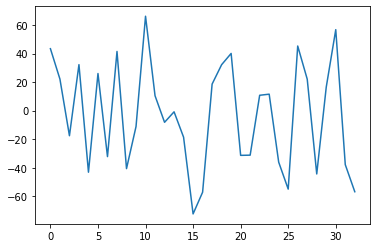

In [ ]:
plt.plot(yx)

### Y por último en grupos de tres ...

In [ ]:
from itertools import combinations
for c in combinations(range(4), 3):
    mx = myLinearModel()
    mx.fit(Xtrain[:, c], ytrain)
    yx = mx.predict(Xtest[:, c])
    mx.score(ytest, yx)
    print(c)

MSE 1570.6500824465695
(0, 1, 2)
MSE 9.817889099249657e-05
(0, 1, 3)
MSE 3105.2136532973436
(0, 2, 3)
MSE 7256.348724353304
(1, 2, 3)
